<a href="https://colab.research.google.com/github/NadivaM/streamlit-example/blob/master/Minor_Spotify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data collection
From: https://www.kaggle.com/code/varunsaikanuri/spotify-data-visualization/input

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Regression coefficients: [-0.71571399 -8.75609677  0.77106111  0.01382028]
Enter a song name to get recommendations: Bye Bye Bye
Recommended songs for: Bye Bye Bye
- Honey Bee by Blake Shelton
- BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj) by YG
- Peaches & Cream by 112
- The Motto by Drake
- Pure Water (with Migos) by Mustard
- Party Up by DMX
- Never Leave You (Uh Oooh, Uh Oooh) by Lumidee
- I Need a Girl (Pt. 2) [feat. Loon, Ginuwine & Mario Winans] by Diddy
- This Ain't A Scene, It's An Arms Race by Fall Out Boy


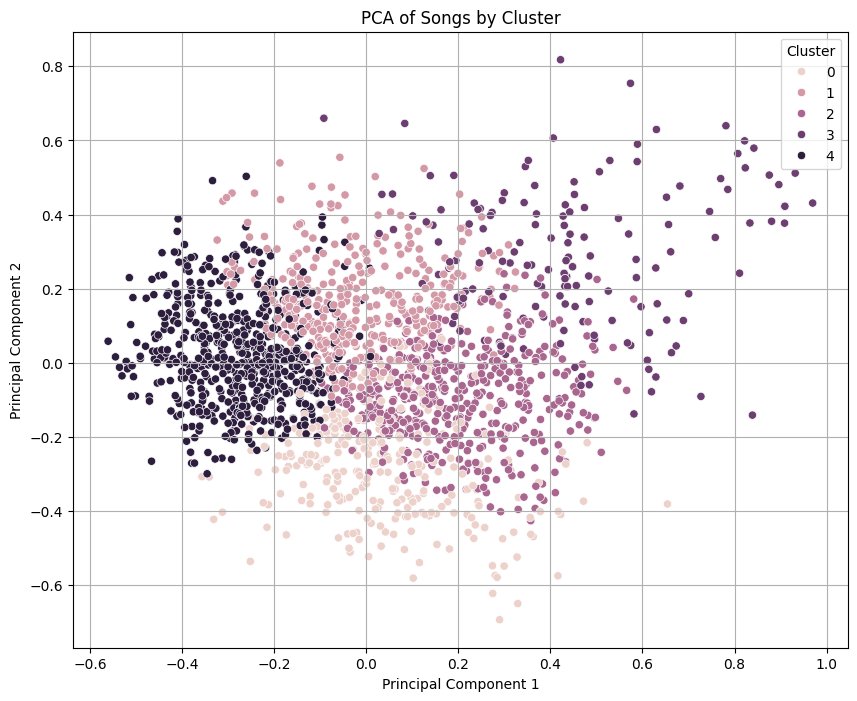

In [69]:
# Import libraries
import pandas as pd
import re
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Define function for normalizing text
def normalize_text(text):
    """Normalize text for consistent comparison by removing non-alphanumeric characters."""
    text = str(text)  # Convert to string to avoid type errors
    return re.sub(r'[^a-zA-Z0-9\s]', '', text).lower().replace(' ', '')

# Define function to load and clean data
def load_data(filepath):
    data = pd.read_csv(filepath)
    data['song'] = data['song'].fillna('missing')  # Fill missing song titles with 'missing'
    data['normalized_song'] = data['song'].apply(normalize_text)
    return data

# Define function to scale features
def scale_features(data):
    features = data[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'acousticness']]
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features

# Setup KNN model
def setup_knn(features):
    knn = NearestNeighbors(n_neighbors=10)
    knn.fit(features)
    return knn

# Perform K-means clustering
def perform_clustering(features):
    kmeans = KMeans(n_clusters=5, random_state=0)
    kmeans.fit(features)
    return kmeans

# Perform PCA
def perform_pca(features):
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(features)
    return pca, principal_components

# Train a linear regression model
def train_regression_model(data):
    features = data[['danceability', 'energy', 'loudness', 'tempo']]
    target = data['popularity']
    model = LinearRegression().fit(features, target)
    return model

# Get recommendations based on the song name
def get_recommendations(song_name, data, knn):
    normalized_name = normalize_text(song_name)
    if normalized_name not in data['normalized_song'].values:
        print(f"Sorry, the song '{song_name}' was not found in our database. Please try a different song.")
        return
    index = data.index[data['normalized_song'] == normalized_name].tolist()[0]
    distances, indices = knn.kneighbors([data.iloc[index][['danceability', 'energy', 'valence', 'tempo', 'loudness', 'acousticness']].values])
    print("Recommended songs for:", song_name)
    for i in indices.flatten()[1:]:
        print(f"- {data.loc[i, 'song']} by {data.loc[i, 'artist']}")

# Visualization function for PCA results
def plot_pca_clusters(pca_df):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df)
    plt.title('PCA of Songs by Cluster')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Main execution block
if __name__ == "__main__":
    data = load_data("/content/songs_normalize (2).csv")
    scaled_features = scale_features(data)
    knn = setup_knn(scaled_features)
    kmeans = perform_clustering(scaled_features)
    data['Cluster'] = kmeans.labels_

    pca, principal_components = perform_pca(scaled_features)
    pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])
    pca_df['Cluster'] = data['Cluster']

    model = train_regression_model(data)
    print(f"Regression coefficients: {model.coef_}")

    song_to_recommend = input("Enter a song name to get recommendations: ")
    get_recommendations(song_to_recommend, data, knn)

    plot_pca_clusters(pca_df)




In [73]:
import streamlit as st


2024-04-21 03:48:30.357 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


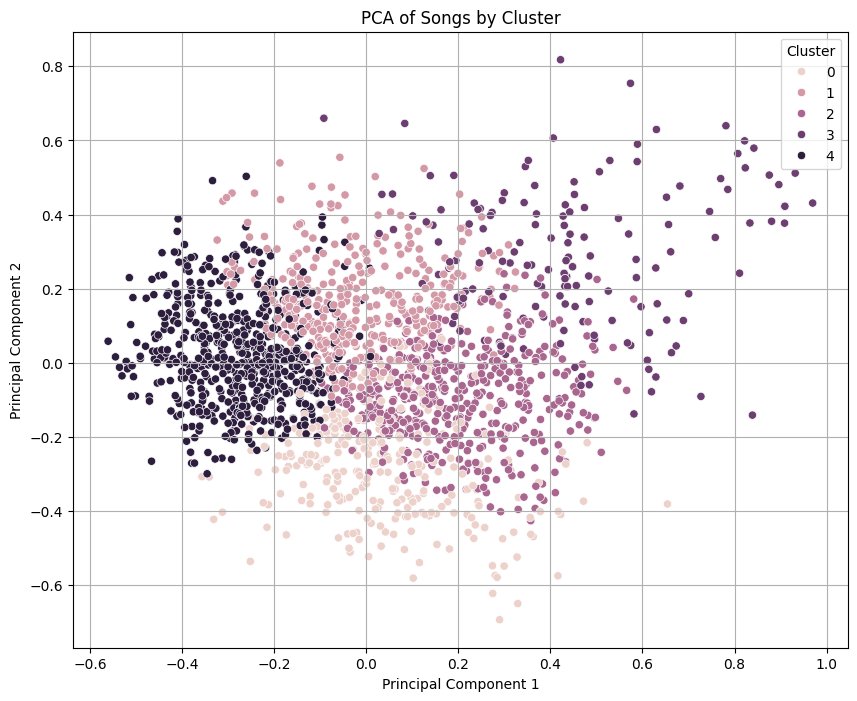

In [74]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the functions load_data(), scale_features(), setup_knn(), normalize_text(),
# perform_clustering(), perform_pca(), and train_regression_model() are defined as above and imported.

# Streamlit web interface setup
def main():
    st.title('Music Recommendation System')

    # Load and prepare data
    data = load_data("/content/songs_normalize (2).csv")
    scaled_features = scale_features(data)
    knn = setup_knn(scaled_features)
    kmeans = perform_clustering(scaled_features)
    data['Cluster'] = kmeans.labels_
    pca, principal_components = perform_pca(scaled_features)
    data = pd.concat([data, pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])], axis=1)
    model = train_regression_model(data)

    # User input
    song_to_recommend = st.text_input("Enter a song name to get recommendations:")
    if st.button('Get Recommendations'):
        if song_to_recommend:
            recommendations = get_recommendations(song_to_recommend, data, knn)
            if recommendations:
                st.write("Recommended songs for:", song_to_recommend)
                for song in recommendations:
                    st.write(f"{song['song']} by {song['artist']}")
            else:
                st.error("Sorry, the song was not found in our database.")
        else:
            st.error("Please enter a song name.")

    # Display PCA plot
    st.pyplot(plot_pca_clusters(data))

def get_recommendations(song_name, data, knn):
    normalized_name = normalize_text(song_name)
    if normalized_name not in data['normalized_song'].values:
        return None
    index = data.index[data['normalized_song'] == normalized_name].tolist()[0]
    _, indices = knn.kneighbors([data.iloc[index][['danceability', 'energy', 'valence', 'tempo', 'loudness', 'acousticness']].values])
    recommendations = data.loc[indices.flatten()[1:]]
    return recommendations[['song', 'artist']]

def plot_pca_clusters(data):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, ax=ax)
    plt.title('PCA of Songs by Cluster')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    return fig

if __name__ == "__main__":
    main()
